In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pykrige.ok import OrdinaryKriging
from pykrige.kriging_tools import write_asc_grid
import pykrige.kriging_tools as kt
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Path, PathPatch

In [125]:
df = pd.read_csv("analysis/precp.csv")
d = '2010-06'
df = df[["lat","long","name",d]]
df = df.dropna(axis = 0, how="any")
lons = np.array(df.long)
lats = np.array(df.lat)
data = np.array(df[d])

In [126]:
grid_space = 0.1
grid_lon = np.arange(lons.min()-0.05, lons.max()+0.1, grid_space) 
grid_lat = np.arange(lats.min()-0.05, lats.max()+0.1, grid_space)
OK = OrdinaryKriging(lons, lats, data, variogram_model='gaussian', verbose=True, enable_plotting=False,nlags=20)
z1, ss1 = OK.execute('grid', grid_lon, grid_lat)
xintrp, yintrp = np.meshgrid(grid_lon, grid_lat)


Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 23134.2786697
Full Sill: 32828.1501406
Range: 2.26053377896
Nugget: 9693.87147092 

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



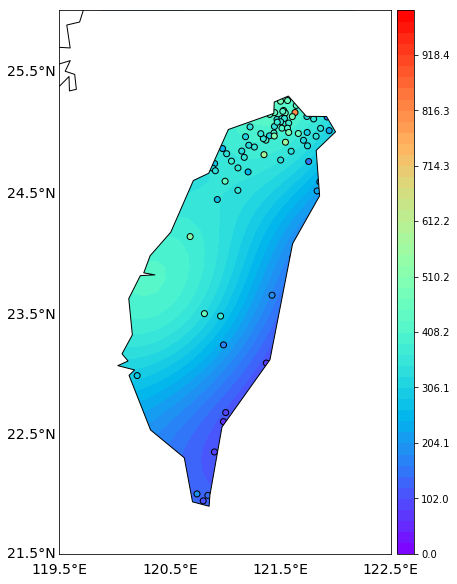

In [128]:
fig, ax = plt.subplots(figsize=(10,10))
m = Basemap(llcrnrlon=119.5,llcrnrlat=21.5,
            urcrnrlon=122.5,urcrnrlat=26, projection='merc', 
            resolution='l',area_thresh=1000.,ax=ax)
m.drawcoastlines() #draw coastlines on the map
x,y=m(xintrp,yintrp)
lo,la = m(lons,lats)
cs = ax.contourf(x,y,z1,
                   cmap="rainbow",
                   levels = np.linspace(0,500,50))
#cs = ax.scatter(lo,la,c=data,cmap="rainbow")
ax.scatter(lo,la,c=data,cmap="rainbow",vmin=0,vmax=1000,edgecolor="k")
cbar=m.colorbar(cs,location='right') #plot the colorbar on the map
parallels = np.arange(21.5,26.0,1)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=14, linewidth=0.0) #Draw the latitude labels on the map
meridians = np.arange(119.5,123.5,1)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=14, linewidth=0.0)

x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
map_edges = np.array([[x0,y0],[x1,y0],[x1,y1],[x0,y1]])
polys = [p.boundary for p in m.landpolygons]
polys = [map_edges]+polys[:]
codes = [
[Path.MOVETO]+[Path.LINETO for p in p[1:]]
for p in polys
]

polys_lin = [v for p in polys for v in p]
codes_lin = [c for cs in codes for c in cs]

path = Path(polys_lin, codes_lin)
patch = PathPatch(path,facecolor='white', lw=0)
ax.add_patch(patch)
plt.show()